In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import math
import pprint
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [2]:
data = pd.read_csv('XOM_sent_news.csv')

In [3]:
data['date']= data['publication_date']
#data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')
#data =data.set_index['date']
#data = date.drop(['publication_date'], axis=1)

In [4]:
data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')

In [5]:
data = data.set_index('date')

In [6]:
data = data.drop(['publication_date'], axis=1)

In [7]:
data[:100]

,compound,headline,neg,neu,pos,label
date,,,,,,
2015-04-08 20:21:06,0.0000,Analysis - Shell's BG purchase could be cataly...,0.000,1.000,0.000,0
2015-04-17 21:57:33,0.2960,Exclusive - Anadarko considers selling Mozambi...,0.000,0.686,0.314,1
2015-07-31 23:12:49,0.0772,Tumbling oil prices slam profit at Exxon Mobil...,0.208,0.560,0.232,0
2015-10-30 18:15:02,0.2382,Exxon 3rd-qtr profit falls 47 pct but beats ex...,0.000,0.804,0.196,1
2016-02-02 20:20:41,0.5106,"Exxon, tops in stock buybacks, now saving its ...",0.000,0.708,0.292,1
2016-02-07 08:14:33,-0.6249,"As Big Oil shrinks, boards plot different path...",0.291,0.709,0.000,-1
2016-03-23 21:32:04,0.3400,Exclusive - Exxon Mobil must allow climate cha...,0.000,0.673,0.327,1
2016-04-29 12:09:44,0.4404,Exxon Mobil first-quarter profit drops 63 percent,0.000,0.674,0.326,1
2016-06-23 16:07:44,-0.3400,California pipeline leaks 700 barrels of oil -...,0.231,0.769,0.000,-1


In [8]:
news_daily = data.resample('D').mean()

In [9]:
# Resample the full dataframe to monthly timeframe
#news_daily = data.resample('D').mean()



In [10]:
news_daily.fillna(0, inplace=True)
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2015-04-08,0.0,0.0,1.0,0.0,0.0
2015-04-09,0.0,0.0,0.0,0.0,0.0
2015-04-10,0.0,0.0,0.0,0.0,0.0
2015-04-11,0.0,0.0,0.0,0.0,0.0
2015-04-12,0.0,0.0,0.0,0.0,0.0


In [11]:
news_daily=news_daily.loc['2016-07-01':'2019-07-01']
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-07-01,-0.1027,0.153,0.726,0.121,-1.0
2016-07-02,-0.0516,0.330,0.446,0.223,0.0
2016-07-03,0.0000,0.000,0.000,0.000,0.0
2016-07-04,0.0000,0.000,0.000,0.000,0.0
2016-07-05,0.0000,0.000,0.000,0.000,0.0


In [12]:
news_daily.describe()

,compound,neg,neu,pos,label
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.050142,0.045924,0.659851,0.081634,0.130217
std,0.141399,0.059269,0.351011,0.077182,0.333352
min,-0.648600,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.696281,0.000000,0.000000
50%,0.024129,0.030770,0.820217,0.080646,0.065591
75%,0.119032,0.070000,0.871946,0.124000,0.312500
max,0.778300,0.451000,1.000000,0.573000,1.000000


### Fundamental Data

In [13]:
fund = pd.read_csv('XOM_Fund.csv')
fund.head()

,date,marketcap,pricetobook,pricetoearnings,dividendyield,earningsyield,nopat,freecashflow,roe,ebitdagrowth,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
0,01/07/2019,3.269110e+11,1.7096,17.6328,0.054206,0.056713,19549310049,1.879831e+10,0.096933,0.175115,...,47591000000,3.561890e+11,1.581680e+11,40825000000,19044000000,19044000000,-20380000000,-14748000000,42068000000,1.2621
1,28/06/2019,3.272100e+11,1.7112,17.6489,0.054156,0.056661,19549310049,1.879831e+10,0.096933,0.175115,...,47591000000,3.561890e+11,1.581680e+11,40825000000,19044000000,19044000000,-20380000000,-14748000000,42068000000,1.2654
2,27/06/2019,3.237510e+11,1.6931,17.4623,0.054735,0.057266,19549310049,1.879831e+10,0.096933,0.175115,...,47591000000,3.561890e+11,1.581680e+11,40825000000,19044000000,19044000000,-20380000000,-14748000000,42068000000,1.2654
3,26/06/2019,3.270820e+11,1.7105,17.6420,0.054178,0.056683,19549310049,1.879831e+10,0.096933,0.175115,...,47591000000,3.561890e+11,1.581680e+11,40825000000,19044000000,19044000000,-20380000000,-14748000000,42068000000,1.2654
4,25/06/2019,3.256730e+11,1.7031,17.5660,0.054412,0.056928,19549310049,1.879831e+10,0.096933,0.175115,...,47591000000,3.561890e+11,1.581680e+11,40825000000,19044000000,19044000000,-20380000000,-14748000000,42068000000,1.2654


In [14]:
fund['date']= pd.to_datetime(fund.date,format='%d/%m/%Y')

In [15]:

fund.index =fund['date']

In [16]:
#fund=fund.loc['2019-07-01':'2016-07-01']

In [17]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 35 columns):
date                              754 non-null datetime64[ns]
marketcap                         754 non-null float64
pricetobook                       754 non-null float64
pricetoearnings                   754 non-null float64
dividendyield                     754 non-null float64
earningsyield                     754 non-null float64
nopat                             754 non-null int64
freecashflow                      754 non-null float64
roe                               754 non-null float64
ebitdagrowth                      754 non-null float64
ebitdamargin                      754 non-null float64
cashdividendspershare             754 non-null float64
bookvaluepershare                 754 non-null float64
capex                             754 non-null int64
currentratio                      754 non-null float64
debttoequity                      754 non-null f

### Price analysis

In [19]:
df_price = pd.read_csv('XOM_price.csv')

In [20]:
df_price['date']= df_price['date']
df_price['date']=pd.to_datetime(df_price.date,format='%Y-%m-%d')
df_price.index =df_price['date']

In [21]:
#df_price = df_price.drop(['date'], axis=1)

In [22]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-08-07,0,70.50,70.8750,69.400,69.86,14968499.0,70.50,2019-08-07,daily,70.8750,False,69.400,69.86,15231052.0
2019-08-06,1,70.96,71.0100,70.280,70.29,12282362.0,70.96,2019-08-06,daily,71.0100,False,70.280,70.29,12282362.0
2019-08-05,2,70.28,70.9200,69.610,70.78,19080930.0,70.28,2019-08-05,daily,70.9200,False,69.610,70.78,19080930.0
2019-08-02,3,71.75,73.2600,71.180,72.61,21376742.0,71.75,2019-08-02,daily,73.2600,False,71.180,72.61,21376742.0
2019-08-01,4,72.46,74.2684,72.265,73.74,17132815.0,72.46,2019-08-01,daily,74.2684,False,72.265,73.74,17132815.0


In [23]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2019-08-07 to 2014-10-30
Data columns (total 14 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 132.4+ KB


In [24]:
df_price=df_price.loc['2019-07-01':'2016-07-01']

In [25]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-07-01,26,76.56,77.925,76.2900,77.13,11453769.0,76.56,2019-07-01,daily,77.925,False,76.2900,77.13,11453769.0
2019-06-28,27,76.63,76.730,75.9407,76.19,14781298.0,76.63,2019-06-28,daily,76.730,False,75.9407,76.19,14781298.0
2019-06-27,28,75.82,76.750,75.7600,76.59,8147803.0,75.82,2019-06-27,daily,76.750,False,75.7600,76.59,8147803.0
2019-06-26,29,76.60,77.130,76.4700,76.68,11365476.0,76.60,2019-06-26,daily,77.130,False,76.4700,76.68,11365476.0
2019-06-25,30,76.27,77.220,76.1900,77.08,9739970.0,76.27,2019-06-25,daily,77.220,False,76.1900,77.08,9739970.0


In [26]:
#df.join(other, lsuffix='_caller', rsuffix='_other')
df_price = df_price.join(news_daily['compound'])
#full_df = pd.merge(df_price,news_daily['compound'],how='left')

In [27]:
df_price=pd.merge(df_price,fund,how='outer',on='date')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
df_price.index =df_price['date']

In [29]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,26,76.56,77.925,76.2900,77.13,11453769.0,76.56,2019-07-01,daily,77.925,...,47591000000,3.561890e+11,1.581680e+11,40825000000,19044000000,19044000000,-20380000000,-14748000000,42068000000,1.2621
2019-06-28,27,76.63,76.730,75.9407,76.19,14781298.0,76.63,2019-06-28,daily,76.730,...,47591000000,3.561890e+11,1.581680e+11,40825000000,19044000000,19044000000,-20380000000,-14748000000,42068000000,1.2654
2019-06-27,28,75.82,76.750,75.7600,76.59,8147803.0,75.82,2019-06-27,daily,76.750,...,47591000000,3.561890e+11,1.581680e+11,40825000000,19044000000,19044000000,-20380000000,-14748000000,42068000000,1.2654
2019-06-26,29,76.60,77.130,76.4700,76.68,11365476.0,76.60,2019-06-26,daily,77.130,...,47591000000,3.561890e+11,1.581680e+11,40825000000,19044000000,19044000000,-20380000000,-14748000000,42068000000,1.2654
2019-06-25,30,76.27,77.220,76.1900,77.08,9739970.0,76.27,2019-06-25,daily,77.220,...,47591000000,3.561890e+11,1.581680e+11,40825000000,19044000000,19044000000,-20380000000,-14748000000,42068000000,1.2654


In [30]:
df_price['Unnamed: 0'].drop

<bound method Series.drop of date
2019-07-01     26
2019-06-28     27
2019-06-27     28
2019-06-26     29
2019-06-25     30
2019-06-24     31
2019-06-21     32
2019-06-20     33
2019-06-19     34
2019-06-18     35
2019-06-17     36
2019-06-14     37
2019-06-13     38
2019-06-12     39
2019-06-11     40
2019-06-10     41
2019-06-07     42
2019-06-06     43
2019-06-05     44
2019-06-04     45
2019-06-03     46
2019-05-31     47
2019-05-30     48
2019-05-29     49
2019-05-28     50
2019-05-24     51
2019-05-23     52
2019-05-22     53
2019-05-21     54
2019-05-20     55
             ... 
2016-08-12    750
2016-08-11    751
2016-08-10    752
2016-08-09    753
2016-08-08    754
2016-08-05    755
2016-08-04    756
2016-08-03    757
2016-08-02    758
2016-08-01    759
2016-07-29    760
2016-07-28    761
2016-07-27    762
2016-07-26    763
2016-07-25    764
2016-07-22    765
2016-07-21    766
2016-07-20    767
2016-07-19    768
2016-07-18    769
2016-07-15    770
2016-07-14    771
2016-07-13  

In [31]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 49 columns):
Unnamed: 0                        754 non-null int64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
compound                          754 non-null float64
marketcap                         754 non-null flo

In [32]:
df_price['ebitda'] = df_price['ebitda'].astype(float)

In [33]:
df_price.columns

Index(['Unnamed: 0', 'adj_close', 'adj_high', 'adj_low', 'adj_open',
       'adj_volume', 'close', 'date', 'frequency', 'high', 'intraperiod',
       'low', 'open', 'volume', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat',
       'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta'],
      dtype='object')

In [34]:
fundamentals=['marketcap', 'pricetobook','pricetoearnings', 'dividendyield', 'earningsyield', 'nopat','freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
        'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments','one_yr_monthly_beta']

In [35]:
for column in fundamentals:
    df_price[column] = df_price[column].astype(float)

In [36]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 49 columns):
Unnamed: 0                        754 non-null int64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
compound                          754 non-null float64
marketcap                         754 non-null flo

### EDA

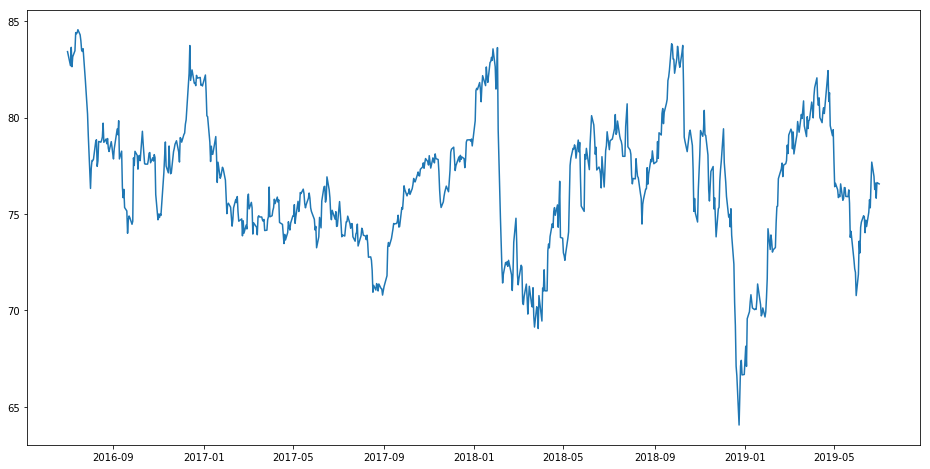

In [37]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_price['adj_close'], label='Close Price history')

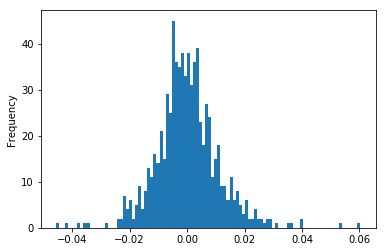

In [38]:
df_price['adj_close'].pct_change().plot.hist(bins=100)

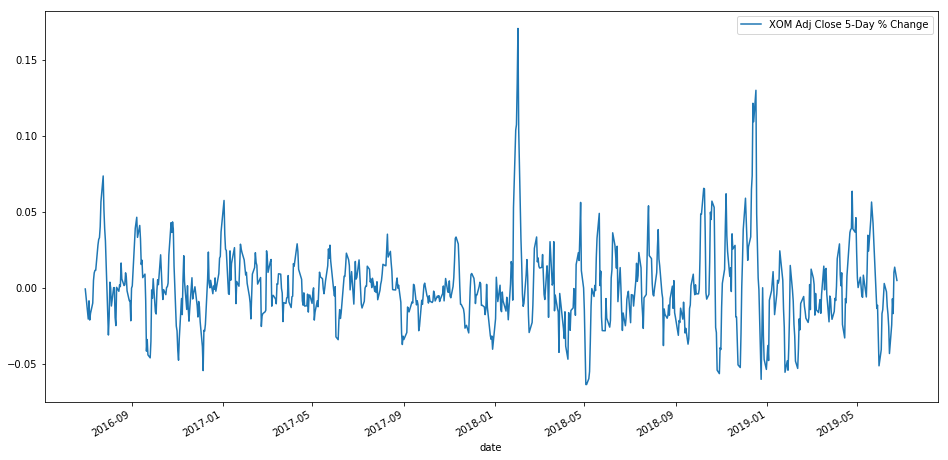

In [40]:
plt.figure(figsize=(16,8))
df_price['adj_close'].pct_change(5).plot(label='XOM Adj Close 5-Day % Change',legend=True)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.005935
5d_close_future_pct     -0.005935             1.000000


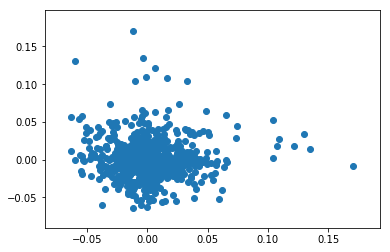

In [41]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_price['5d_future_close'] = df_price['adj_close'].shift(-5)
df_price['5d_close_future_pct'] = df_price['5d_future_close'].pct_change(5)
df_price['5d_close_pct'] = df_price['adj_close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(df_price['5d_close_pct'], df_price['5d_close_future_pct'])
plt.show()

                     compound  5d_close_future_pct
compound             1.000000            -0.103754
5d_close_future_pct -0.103754             1.000000


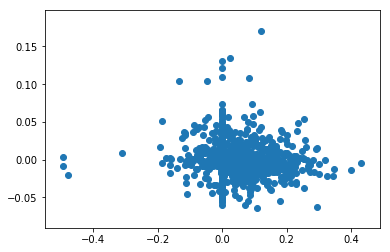

In [42]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['compound', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(df_price['compound'], df_price['5d_close_future_pct'])
plt.show()

In [43]:
import talib

In [44]:
MACD = talib.MACD(df_price['adj_close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
STOCH = talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

In [45]:
data = [MACD, STOCH]
df = pd.DataFrame(data)

In [84]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

#df_price['MACD'] = talib.MACD(df_price['adj_close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
    
#df_price['STOCH'] = talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = talib.SMA(df_price['adj_close'].values,
                              timeperiod=n) / df_price['adj_close']
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)
    
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

    

        

feature_names = feature_names + ['compound'] + fundamentals
print(feature_names)



['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare', 'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'ebitda', 'totalassets', 'totalliabilities', 'debt', 'netincome', 'netcashfromoperatingactivities', 'netcashfrominvestingactivities', 'netcashfromfinancingactivities', 'longterminvestments', 'one_yr_monthly_beta']


In [47]:
df1 = df_price.copy()

In [48]:
#df1.join(df123['compound'],how='right')

In [85]:
# Drop all na values
df_price = df_price.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = df_price[feature_names]
targets = df_price['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = df_price[['5d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                                5d_close_future_pct  5d_close_pct      ma14  \
5d_close_future_pct                        1.000000     -0.030648  0.072553   
5d_close_pct                              -0.030648      1.000000 -0.854961   
ma14                                       0.072553     -0.854961  1.000000   
rsi14                                     -0.079484      0.663074 -0.856748   
ma30                                       0.117590     -0.653210  0.867493   
rsi30                                     -0.114689      0.536294 -0.726704   
ma50                                       0.121927     -0.527920  0.727795   
rsi50                                     -0.152701      0.477471 -0.653799   
ma200                                      0.180427     -0.392779  0.539781   
rsi200                                    -0.145193      0.379381 -0.521712   
compound                                  -0.101030      0.070979 -0.061439   
marketcap                                 -0.236909 

In [50]:
# Check for multicollinearity
columns = list(feat_targ_df.columns)
columns.remove('5d_close_future_pct')
number_of_columns_to_delete = 0

# We loop over all features
for i in range(len(columns)):
    column_i = columns[i]
    
   
    for j in range(i+1, len(columns)):
        column_j = columns[j]
        
        # Use .corr to detect correlation between the two features selected
        correlation = feat_targ_df[column_i].corr(feat_targ_df[column_j])
        
        # if correlation is higher than 0.9, a statement prints the correlation value
        if (column_i != column_j) and (correlation > 0.75):
            number_of_columns_to_delete = number_of_columns_to_delete + 1
            print(column_i +" is highly correlated with " + column_j + " with a correlation score of: {0:.4}".format(correlation))
            
if number_of_columns_to_delete == 0:
    print("No major correlation detected.")

ma14 is highly correlated with ma30 with a correlation score of: 0.8604
rsi14 is highly correlated with rsi30 with a correlation score of: 0.9301
rsi14 is highly correlated with rsi50 with a correlation score of: 0.841
ma30 is highly correlated with ma50 with a correlation score of: 0.9164
rsi30 is highly correlated with rsi50 with a correlation score of: 0.9749
rsi30 is highly correlated with rsi200 with a correlation score of: 0.8456
ma50 is highly correlated with ma200 with a correlation score of: 0.7543
rsi50 is highly correlated with rsi200 with a correlation score of: 0.9311
rsi50 is highly correlated with marketcap with a correlation score of: 0.8002
rsi50 is highly correlated with pricetobook with a correlation score of: 0.766
rsi200 is highly correlated with marketcap with a correlation score of: 0.9128
rsi200 is highly correlated with pricetobook with a correlation score of: 0.8469
pricetoearnings is highly correlated with debttoequity with a correlation score of: 0.8143
earn

In [51]:
feature_names = ['5d_close_pct', 'ma14','ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield']






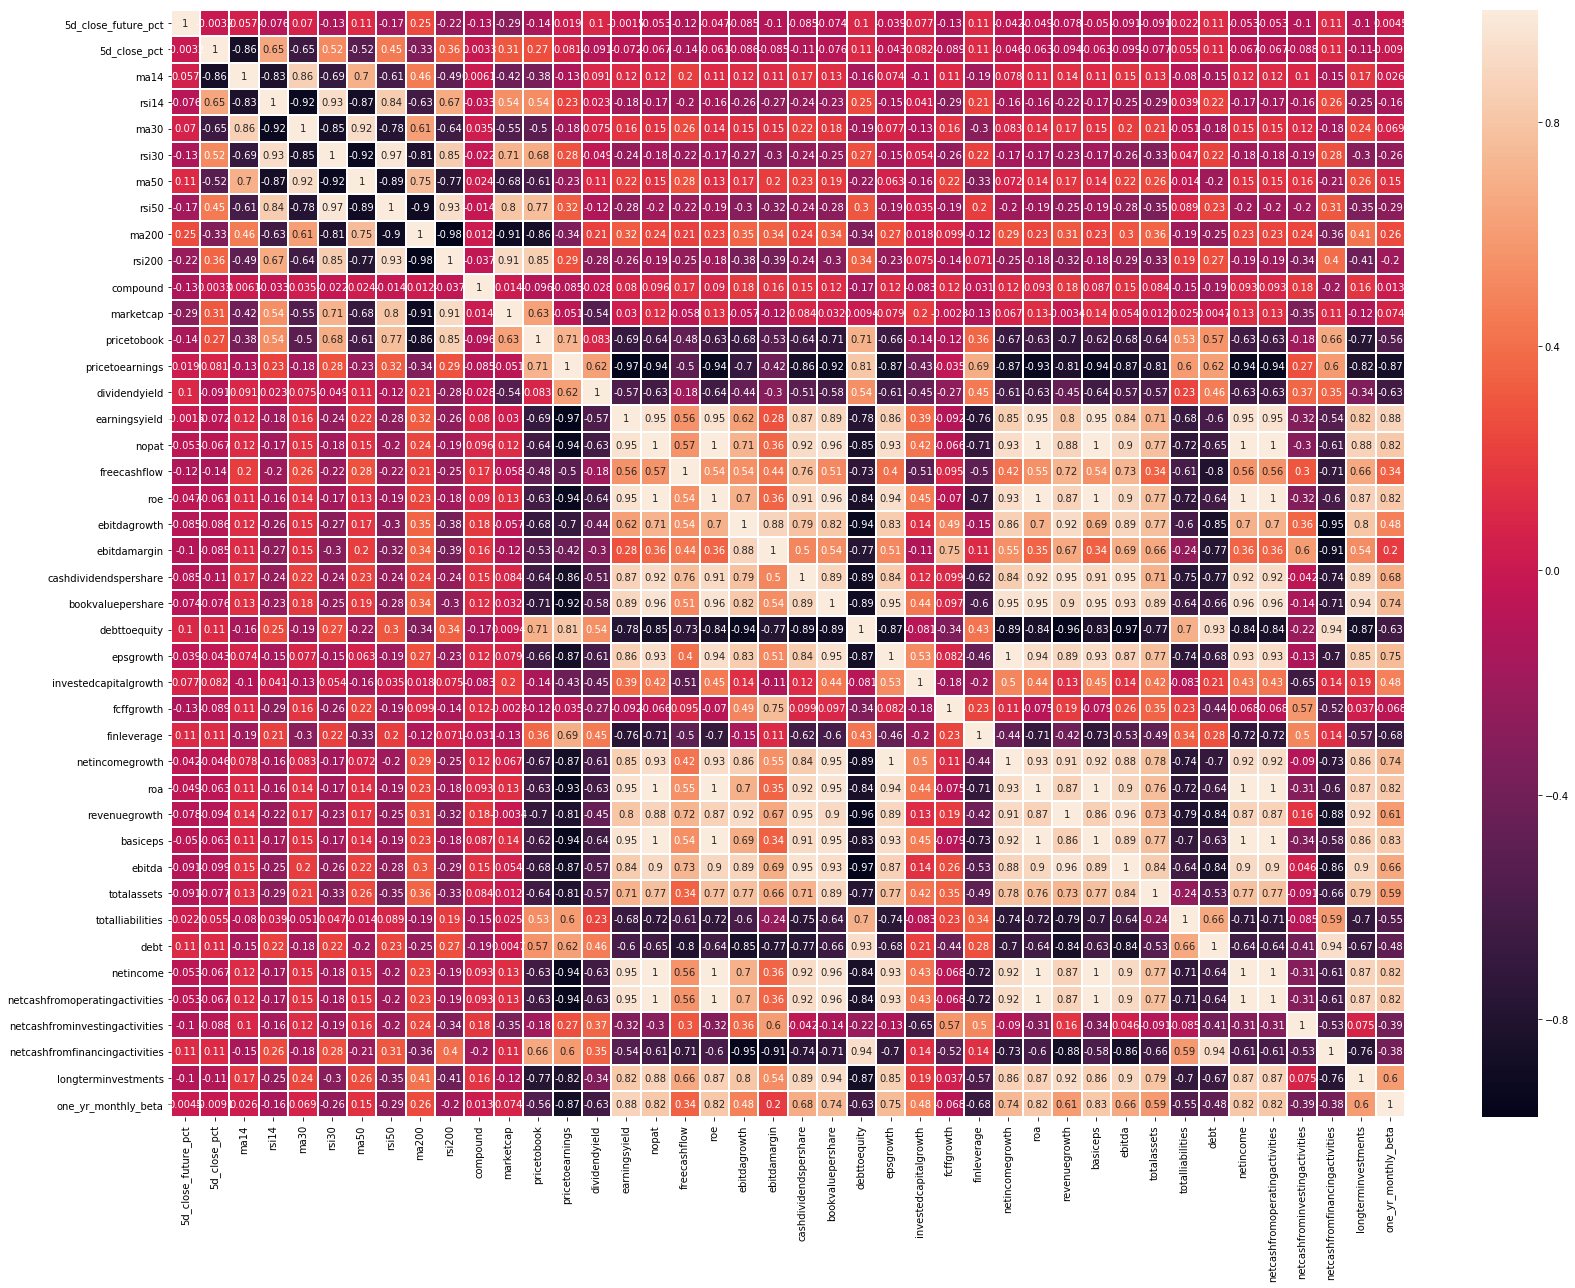

<Figure size 432x288 with 0 Axes>

In [52]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True,linewidths=1)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
#plt.scatter(df_price['ma200'], df_price['5d_close_future_pct'])
#plt.show()

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=7):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        variables = np.delete(variables, maxloc)
        dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [56]:
calculate_vif_(train_features,thresh=7)

dropping 'fcffgrowth' at index: 26
Remaining variables:
Index(['const', '5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50',
       'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat',
       'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'debttoequity',
       'epsgrowth', 'investedcapitalgrowth', 'finleverage', 'netincomegrowth',
       'roa', 'revenuegrowth', 'basiceps', 'ebitda', 'totalassets',
       'totalliabilities', 'debt', 'netincome',
       'netcashfromoperatingactivities', 'netcashfrominvestingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta'],
      dtype='object')


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,const,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2018-09-12,1.0,-0.017724,1.018637,47.043517,1.009467,52.832349,0.989602,53.250329,0.950880,51.315789,...,4.278100e+10,3.487900e+11,1.552570e+11,4.122000e+10,2.126300e+10,2.126300e+10,-1.604600e+10,-1.581100e+10,3.969100e+10,1.2076
2018-09-11,1.0,-0.009207,1.019413,45.632419,1.013971,52.202524,0.994060,52.886145,0.954201,51.225223,...,4.278100e+10,3.487900e+11,1.552570e+11,4.122000e+10,2.126300e+10,2.126300e+10,-1.604600e+10,-1.581100e+10,3.969100e+10,1.2076
2018-09-10,1.0,-0.020381,1.030867,40.113359,1.028471,49.597356,1.008463,51.359537,0.967838,50.841125,...,4.278100e+10,3.487900e+11,1.552570e+11,4.122000e+10,2.126300e+10,2.126300e+10,-1.604600e+10,-1.581100e+10,3.969100e+10,1.2076
2018-09-07,1.0,-0.013145,1.025916,40.916380,1.026905,49.867423,1.007490,51.508578,0.966583,50.879751,...,4.278100e+10,3.487900e+11,1.552570e+11,4.122000e+10,2.126300e+10,2.126300e+10,-1.604600e+10,-1.581100e+10,3.969100e+10,1.2076
2018-09-06,1.0,-0.022595,1.038662,35.125514,1.043815,46.899527,1.025012,49.733283,0.983145,50.425139,...,4.278100e+10,3.487900e+11,1.552570e+11,4.122000e+10,2.126300e+10,2.126300e+10,-1.604600e+10,-1.581100e+10,3.969100e+10,1.2076
2018-09-05,1.0,-0.021292,1.022659,41.030025,1.032211,48.963746,1.014457,50.868419,0.972384,50.715877,...,4.278100e+10,3.487900e+11,1.552570e+11,4.122000e+10,2.126300e+10,2.126300e+10,-1.604600e+10,-1.581100e+10,3.969100e+10,1.2076
2018-09-04,1.0,-0.031016,1.030675,36.747819,1.045589,46.729588,1.028349,49.512003,0.985345,50.362962,...,4.278100e+10,3.487900e+11,1.552570e+11,4.122000e+10,2.126300e+10,2.126300e+10,-1.604600e+10,-1.581100e+10,3.969100e+10,1.2076
2018-08-31,1.0,-0.018847,1.027762,36.290374,1.046884,46.483518,1.029772,49.361376,0.986884,50.323492,...,4.278100e+10,3.487900e+11,1.552570e+11,4.122000e+10,2.126300e+10,2.126300e+10,-1.604600e+10,-1.581100e+10,3.969100e+10,1.2076
2018-08-30,1.0,-0.016131,1.019598,38.621710,1.042102,47.296955,1.025130,49.802888,0.982884,50.434108,...,4.278100e+10,3.487900e+11,1.552570e+11,4.122000e+10,2.126300e+10,2.126300e+10,-1.604600e+10,-1.581100e+10,3.969100e+10,1.2076


In [57]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_features.values, i) for i in range(train_features.shape[1])]
vif["features"] = train_features.columns

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [58]:
vif.round(1)

,VIF Factor,features
0,0.000000e+00,const
1,4.300000e+00,5d_close_pct
2,1.420000e+01,ma14
3,2.067000e+02,rsi14
4,4.410000e+01,ma30
5,2.776600e+03,rsi30
6,5.870000e+01,ma50
7,3.541100e+03,rsi50
8,3.244000e+02,ma200
9,8.546000e+02,rsi200


In [55]:
# Import the statsmodels library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.80 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)
print(linear_features.shape, train_features.shape, test_features.shape)

(549, 42) (439, 42) (110, 42)
(549, 42) (439, 42) (110, 42)


In [60]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.293
Model:                             OLS   Adj. R-squared:                  0.262
Method:                  Least Squares   F-statistic:                     9.657
Date:                 Thu, 08 Aug 2019   Prob (F-statistic):           1.70e-22
Time:                         20:09:36   Log-Likelihood:                 1116.2
No. Observations:                  439   AIC:                            -2194.
Df Residuals:                      420   BIC:                            -2117.
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
co

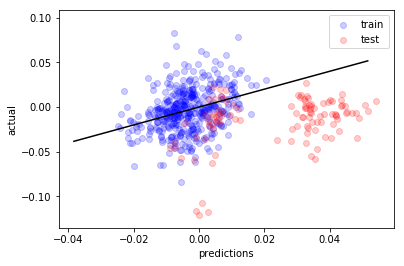

In [124]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha= 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [61]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# scikit-learn:
lr = LinearRegression()
lr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(train_features)
test_predictions = lr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()

In [62]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

0.29274807440499695
-1194955056924776.0


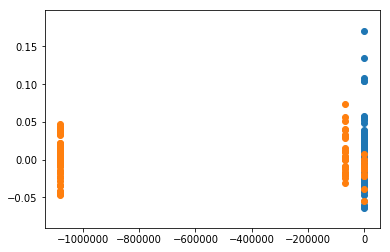

In [63]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)

(549, 42) (439, 42) (110, 42)
(549, 42) (439, 42) (110, 42)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [66]:
# scikit-learn:
lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()b

In [67]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

-6.311986476133011e+23
-5.593059464277996e+23


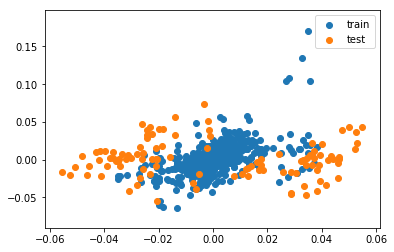

In [68]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Feature Engineering

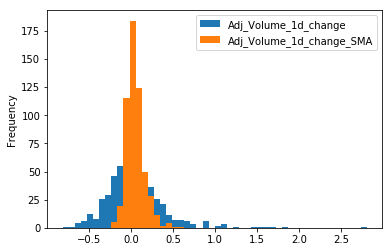

In [69]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA'] # +['MACD','STOCH']
feature_names.extend(new_features)
df_price['Adj_Volume_1d_change'] = df_price['adj_volume'].pct_change()
df_price['Adj_Volume_1d_change_SMA'] = talib.SMA(df_price['Adj_Volume_1d_change'].values,
                                               timeperiod=5)
#df_price['MACD'] = talib.MACD(df_price['adj_close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
#df_price['STOCH'] = talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)


# Plot histogram of volume % change data
df_price[new_features].plot(kind='hist', sharex=False, bins=50)
plt.show()

In [70]:
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(df_price.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)

# Set the index as the original DataFrame index for merging
days_of_week.index = df_price.index

# Join the dataframe with the days of week DataFrame
df_price = pd.concat([df_price, days_of_week], axis=1)

# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
df_price.dropna(inplace=True)  # drop missing values in-place
print(df_price.head())

            Unnamed: 0  adj_close   adj_high    adj_low  adj_open  adj_volume  \
date                                                                            
2018-09-05         231  78.756389  78.824149  77.052711  77.34311  13878418.0   
2018-09-04         232  77.720630  78.107830  77.255991  77.83679   8855027.0   
2018-08-31         233  77.604470  77.885190  77.217271  77.67223  10700016.0   
2018-08-30         234  77.933590  78.194949  77.556070  77.87551   7450853.0   
2018-08-29         235  78.272389  78.446629  77.531870  77.86583   8004792.0   

            close       date frequency   high    ...          ma50      rsi50  \
date                                             ...                            
2018-09-05  81.36 2018-09-05     daily  81.43    ...      1.014457  50.868419   
2018-09-04  80.29 2018-09-04     daily  80.69    ...      1.028349  49.512003   
2018-08-31  80.17 2018-08-31     daily  80.46    ...      1.029772  49.361376   
2018-08-30  80.51 2018-08-3

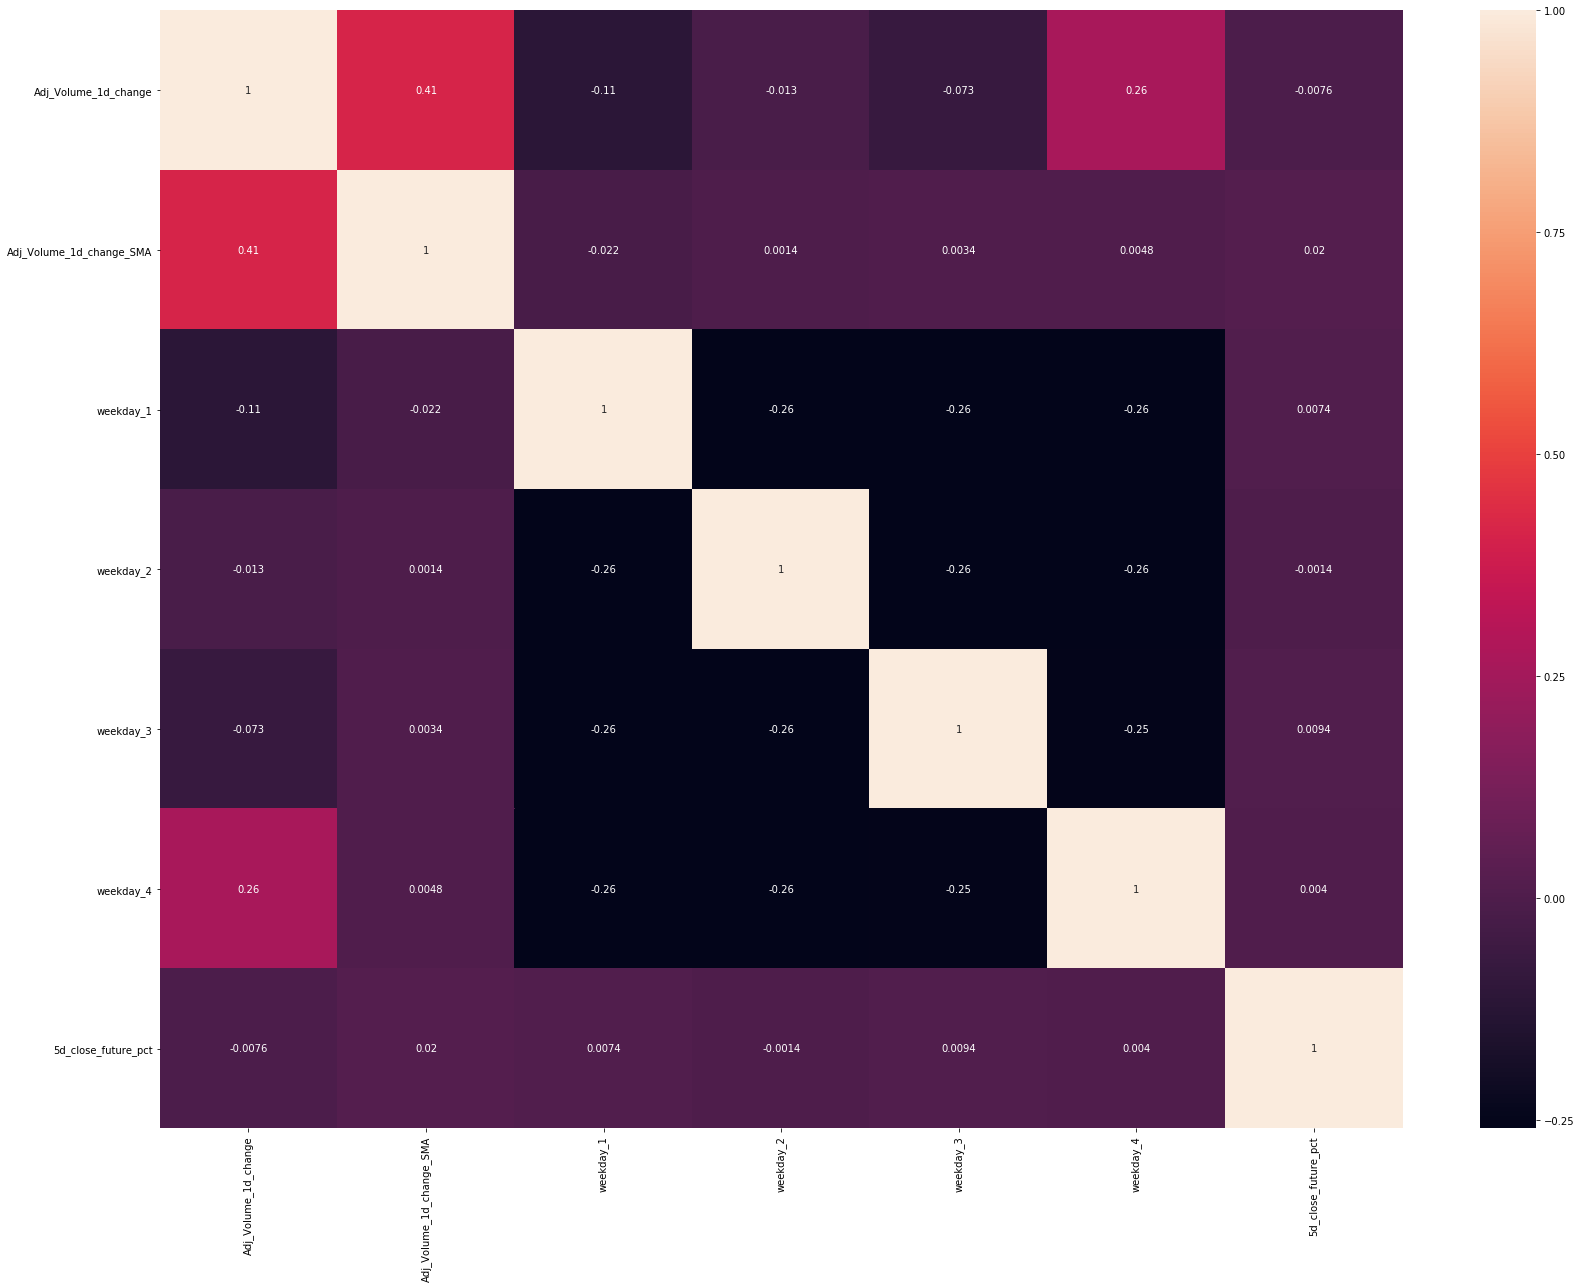

In [71]:
# Add the weekday labels to the new_features list
new_features.extend(['weekday_' + str(i) for i in range(1, 5)])
plt.figure(figsize=(24, 18))
# Plot the correlations between the new features and the targets
sns.heatmap(df_price[new_features + ['5d_close_future_pct']].corr(), annot=True)
plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
plt.xticks(rotation=90)  # ensure x-axis ticklabels are vertical
plt.tight_layout()
plt.show()

### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9999898879458163
-0.0756868416389802


In [73]:
#Scaled Data
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(scaled_train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(scaled_train_features, train_targets))
print(decision_tree.score(scaled_test_features, test_targets))

0.9999898879458163
0.005822364557410253


In [74]:
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.4268184258597941
-0.009298222666525913 

max_depth= 5
0.7128387821115069
-0.10340550494543388 

max_depth= 10
0.9413947545391429
-0.30082477455684153 



In [75]:
#Scaled Data
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(scaled_train_features, train_targets))
    print(decision_tree.score(scaled_test_features, test_targets), '\n')

max_depth= 3
-0.31250027269206626
-0.3011903798140456 

max_depth= 5
-0.33465324501399984
-0.16273557735844402 

max_depth= 10
-0.8124888823560829
-0.651171468385398 



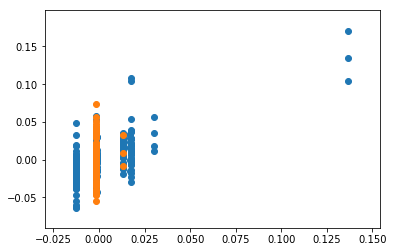

In [76]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

### Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9360314372153236
-0.09105755025074647


Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [78]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.02352096725848407 {'random_state': 42, 'n_estimators': 200, 'max_features': 8, 'max_depth': 3}


In [79]:
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.3454224079985412
-0.011444298387832896


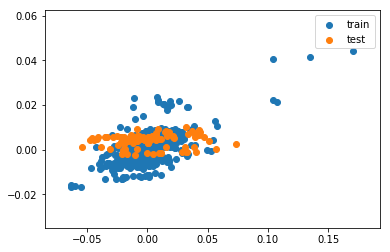

In [80]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

In [86]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
#x = range(features.shape)
# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical

plt.xticks(rotation=90)
plt.show()

IndexError: index 41 is out of bounds for axis 0 with size 41

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features,test_targets))

0.4280696901572375
0.019413345143846517


In [88]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(feature_names)[sorted_index]

plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

IndexError: index 41 is out of bounds for axis 0 with size 41

### K Nearest Neighbour

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


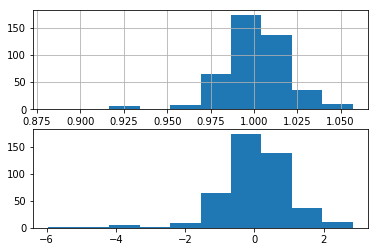

In [89]:


# Remove unimportant features (weekdays)
train_features = train_features.iloc[:, :-4]
test_features = test_features.iloc[:, :-4]

# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [93]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 20):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.6702441686567786
-0.29089499583526

n_neighbors = 3
train, test scores
0.5467346884929707
-0.3140569137297582

n_neighbors = 4
train, test scores
0.5076665205623095
-0.3178386752111553

n_neighbors = 5
train, test scores
0.4713653154651103
-0.25688364121210006

n_neighbors = 6
train, test scores
0.43905355659264644
-0.2464557958994813

n_neighbors = 7
train, test scores
0.4155013167064854
-0.2520192982420304

n_neighbors = 8
train, test scores
0.4069885882431684
-0.2506594712315455

n_neighbors = 9
train, test scores
0.4006337373903601
-0.24176387388558473

n_neighbors = 10
train, test scores
0.3772975616654396
-0.21176153166541933

n_neighbors = 11
train, test scores
0.35931039356026595
-0.21347042493415813

n_neighbors = 12
train, test scores
0.3358060010163738
-0.18794583090257655

n_neighbors = 13
train, test scores
0.33897787483413555
-0.164706649150832

n_neighbors = 14
train, test scores
0.3198500937693639
-0.1478919146697446

n_neighbors = 1

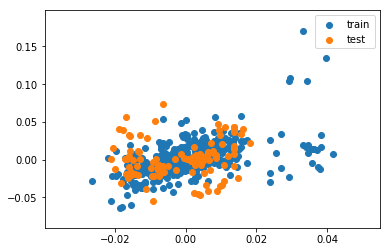

In [94]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=17)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Neural Network 

In [95]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

Epoch 1/25
439/439 [==============================] - 0s 395us/step - loss: 0.0587
Epoch 2/25
439/439 [==============================] - 0s 23us/step - loss: 0.0123
Epoch 3/25
439/439 [==============================] - 0s 22us/step - loss: 0.0046
Epoch 4/25
439/439 [==============================] - 0s 28us/step - loss: 0.0029
Epoch 5/25
439/439 [==============================] - 0s 25us/step - loss: 0.0019
Epoch 6/25
439/439 [==============================] - 0s 26us/step - loss: 0.0015
Epoch 7/25
439/439 [==============================] - 0s 30us/step - loss: 0.0012
Epoch 8/25
439/439 [==============================] - 0s 23us/step - loss: 0.0012
Epoch 9/25
439/439 [==============================] - 0s 26us/step - loss: 0.0010
Epoch 10/25
439/439 [==============================] - 0s 29us/step - loss: 8.5930e-04
Epoch 11/25
439/439 [==============================] - 0s 24us/step - loss: 9.4083e-04
Epoch 12/25
439/439 [==============================] - 0s 25us/step - loss: 8.0156e-04


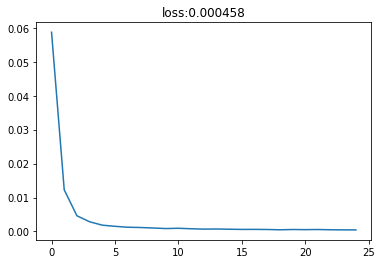

In [96]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

0.21802739247345904
-152.81874153453214


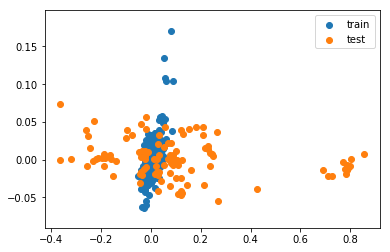

In [97]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds,test_targets, label='test')
plt.legend()
plt.show()

In [98]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x1a1e2fc620>


Epoch 1/25
439/439 [==============================] - 0s 432us/step - loss: 3.8450
Epoch 2/25
439/439 [==============================] - 0s 25us/step - loss: 0.9418
Epoch 3/25
439/439 [==============================] - 0s 24us/step - loss: 0.3732
Epoch 4/25
439/439 [==============================] - 0s 39us/step - loss: 0.2369
Epoch 5/25
439/439 [==============================] - 0s 27us/step - loss: 0.1719
Epoch 6/25
439/439 [==============================] - 0s 24us/step - loss: 0.1585
Epoch 7/25
439/439 [==============================] - 0s 32us/step - loss: 0.1316
Epoch 8/25
439/439 [==============================] - 0s 27us/step - loss: 0.1072
Epoch 9/25
439/439 [==============================] - 0s 30us/step - loss: 0.0916
Epoch 10/25
439/439 [==============================] - 0s 30us/step - loss: 0.0799
Epoch 11/25
439/439 [==============================] - 0s 24us/step - loss: 0.0801
Epoch 12/25
439/439 [==============================] - 0s 32us/step - loss: 0.0753
Epoch 13/25


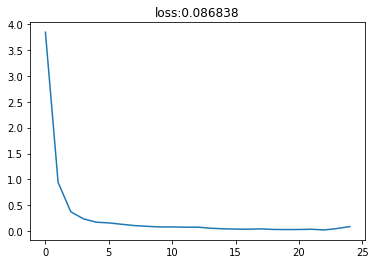

In [99]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-11.325242503759178
-105.67483340129208


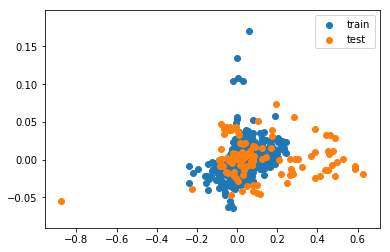

In [100]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label= 'test')  # plot test set
plt.legend(); plt.show()

Epoch 1/25
439/439 [==============================] - 0s 528us/step - loss: 0.1874
Epoch 2/25
439/439 [==============================] - 0s 37us/step - loss: 0.0789
Epoch 3/25
439/439 [==============================] - 0s 29us/step - loss: 0.0520
Epoch 4/25
439/439 [==============================] - 0s 28us/step - loss: 0.0372
Epoch 5/25
439/439 [==============================] - 0s 26us/step - loss: 0.0362
Epoch 6/25
439/439 [==============================] - 0s 33us/step - loss: 0.0292
Epoch 7/25
439/439 [==============================] - 0s 29us/step - loss: 0.0233
Epoch 8/25
439/439 [==============================] - 0s 34us/step - loss: 0.0169
Epoch 9/25
439/439 [==============================] - 0s 25us/step - loss: 0.0173
Epoch 10/25
439/439 [==============================] - 0s 27us/step - loss: 0.0166
Epoch 11/25
439/439 [==============================] - 0s 37us/step - loss: 0.0137
Epoch 12/25
439/439 [==============================] - 0s 32us/step - loss: 0.0131
Epoch 13/25


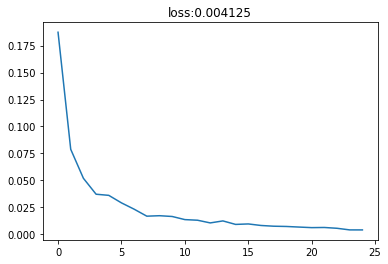

In [101]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [102]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1,test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[0.22312261 0.22246152 0.09371003 0.09234021 0.2249815 ]


-1.037299967919048
-66.18390327506222


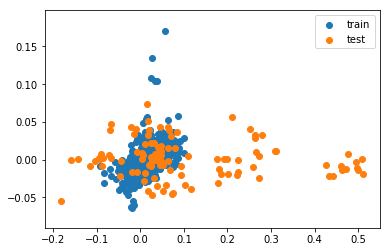

In [103]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()